# Задание 1.3.1

Задайте 4 точки в трехмерном пространстве, рассчитайте между ними 
расстояния по описанным в примере выше метрикам. Отобразите точки 
в трехмерном пространстве.

Расстояние между точками 0 и 1
Расстояние Евклида: 3.6283645447922876
Квадрат Евклидова расстояния: 13.165029269905745
Расстояние Чебышева: 2.958259929744419
Расстояние Хемминга: 5.0628733601032225 
	
Расстояние между точками 0 и 2
Расстояние Евклида: 1.570225847208879
Квадрат Евклидова расстояния: 2.465609211242842
Расстояние Чебышева: 1.2875568699012794
Расстояние Хемминга: 2.457961310459636 
	
Расстояние между точками 0 и 3
Расстояние Евклида: 3.3830394701213287
Квадрат Евклидова расстояния: 11.4449560563988
Расстояние Чебышева: 2.553412027586997
Расстояние Хемминга: 5.401162893461857 
	
Расстояние между точками 1 и 2
Расстояние Евклида: 2.5693622631928665
Квадрат Евклидова расстояния: 6.601622439519569
Расстояние Чебышева: 1.7635559748054115
Расстояние Хемминга: 4.271064895693079 
	
Расстояние между точками 1 и 3
Расстояние Евклида: 3.567832865393361
Квадрат Евклидова расстояния: 12.729431355381001
Расстояние Чебышева: 2.8651381033320513
Расстояние Хемминга: 5.3572121983910845 
	
Р

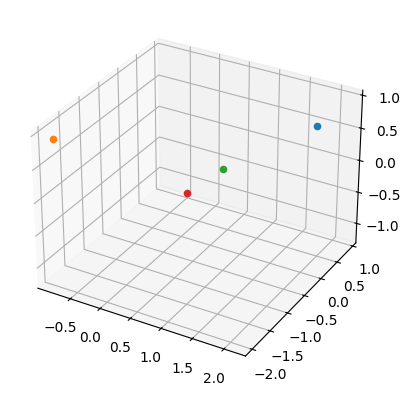

In [6]:
import numpy as np
import matplotlib.pyplot as plt

arr = np.random.randn(4, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for i in arr:
    ax.scatter(i[0], i[1], i[2])

for i in range(0, 4):
    for j in range(i, 4):
        if i != j:
            print('Расстояние между точками', i, 'и', j)
            print('Расстояние Евклида:', np.linalg.norm(arr[i]-arr[j]))
            print('Квадрат Евклидова расстояния:', np.linalg.norm(arr[i]-arr[j])**2)
            print('Расстояние Чебышева:', np.linalg.norm(arr[i]-arr[j], ord = np.inf))
            print('Расстояние Хемминга:', np.linalg.norm(arr[i]-arr[j], ord = 1), '\n\t')


# Задание 1.3.2

Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания 
необходимо использовать функцию arange.

In [7]:
import numpy as np

arr = np.zeros((5,5))
arr +=np.arange(5)

print(arr)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


# Задание 2.3.1

Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты.

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [23]:
iris = sns.load_dataset('iris')
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


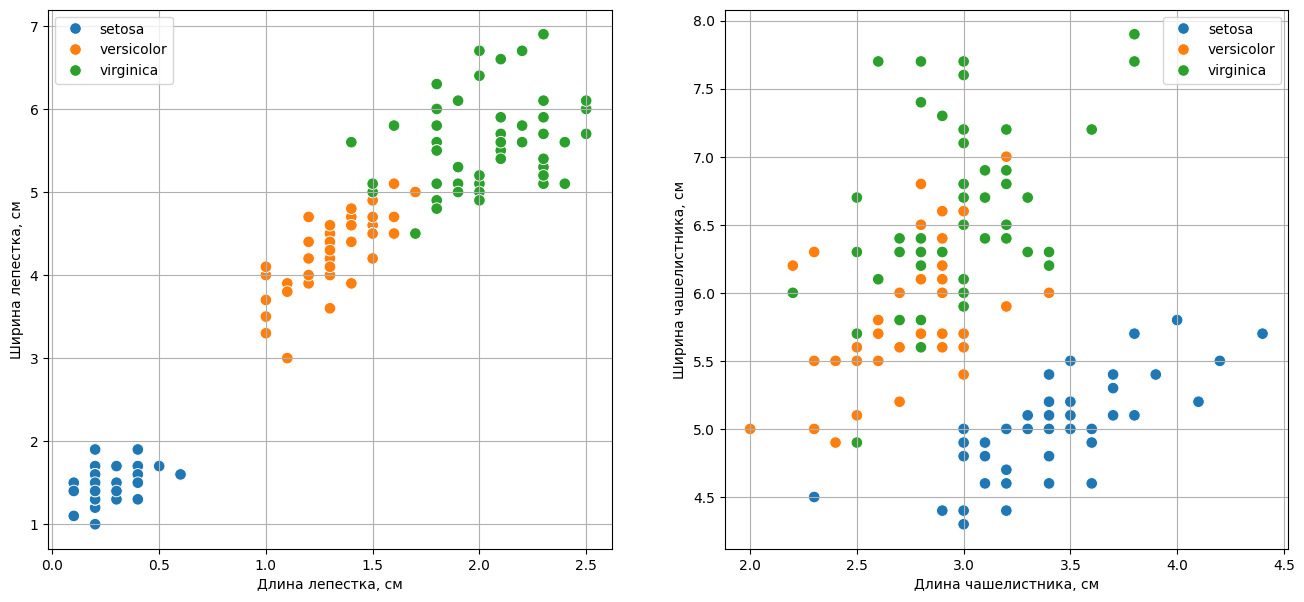

In [33]:
plt.figure(figsize=(16,7))

plt.subplot(121)
sns.scatterplot(data = iris, x="petal_width", y="petal_length", hue="species", s=70)

plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend()
plt.grid()

plt.subplot(122)
sns.scatterplot(data= iris, x='sepal_width', y='sepal_length', hue='species', s=70)
plt.xlabel('Длина чашелистника, см')
plt.ylabel('Ширина чашелистника, см')
plt.legend()
plt.grid()

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(iris.iloc[:,:-1], iris.iloc[:, -1], test_size = 0.15)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
X_train.head()
Y_train.head()

26         setosa
66     versicolor
79     versicolor
102     virginica
9          setosa
Name: species, dtype: object

accuracy: 0.913
accuracy: 0.957
accuracy: 0.957


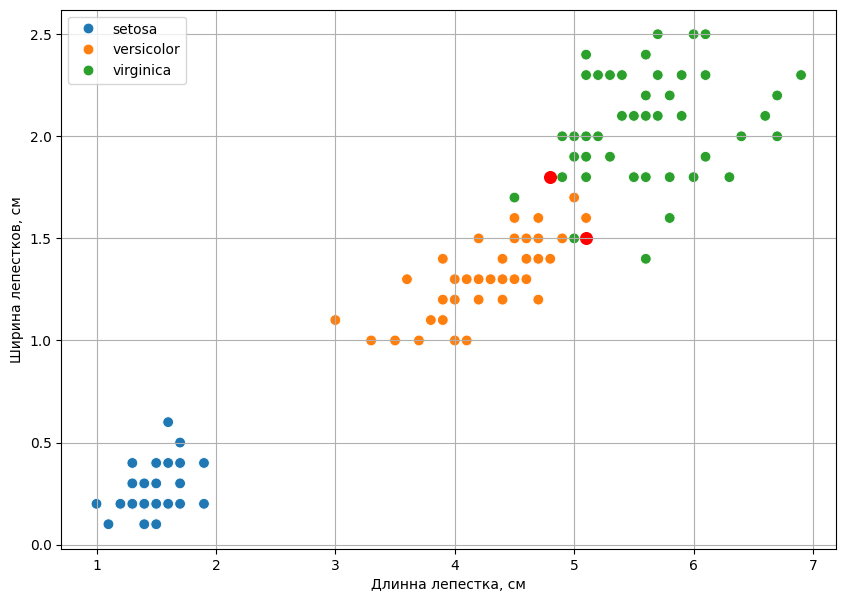

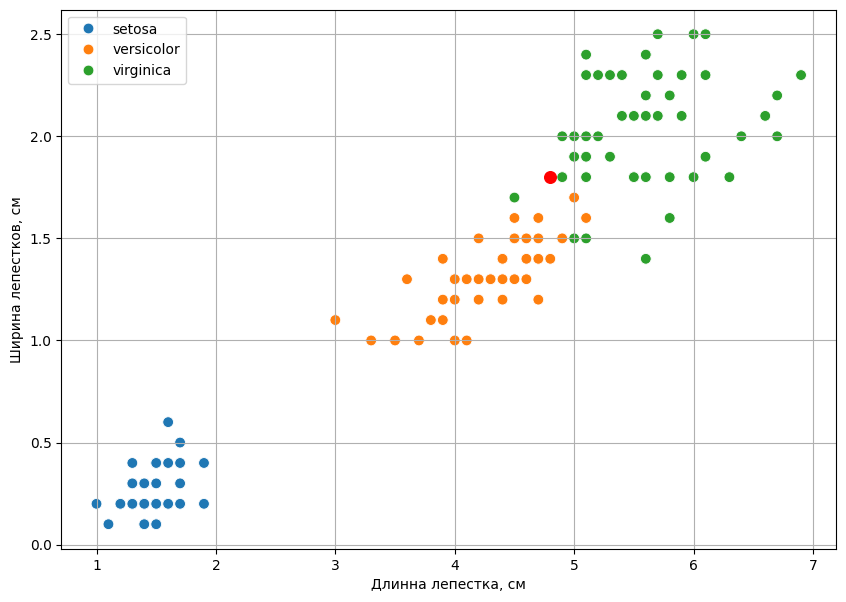

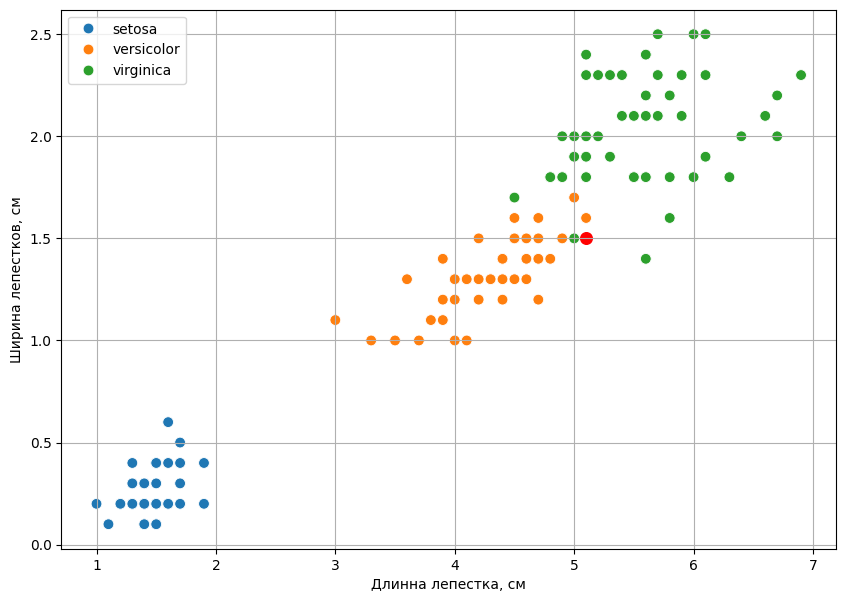

In [40]:
k = [1, 5, 10]
for i in range(0,3):
    model = KNeighborsClassifier(n_neighbors=k[i])
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        data = iris,
        x = "petal_length", y = "petal_width",
        hue = "species",
        s = 60,
    )

    plt.xlabel("Длинна лепестка, см")
    plt.ylabel("Ширина лепестков, см")
    plt.legend()
    plt.grid()

    for i in range(len(Y_test)):
        if np.array(Y_test)[i] != Y_pred[i]:
            plt.scatter(
                X_test.iloc[i, 2], 
                X_test.iloc[i, 3],
                color = "red",
                s = 70 )

    print(f'accuracy: {accuracy_score(Y_test, Y_pred):.3}')

# Задание 3.3.1

Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.

In [1]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"Red" : 2, "Blue":4},
             {"Red" : 4, "Blue":3},
             {"Red" : 1, "Yellow":2},
             {"Red" : 2, "Yellow":2}]

dictvectorizer = DictVectorizer(sparse = False)
features = dictvectorizer.fit_transform(data_dict)

features

array([[4., 2., 0.],
       [3., 4., 0.],
       [0., 1., 2.],
       [0., 2., 2.]])